# This Script Contains
1. Import libraries & data
2. Elbow Technique & Scaling
3. K Means Clustering
4. K Means Clustering w/ Subset
5. Descriptive Statistics

## Import Libraries & Data

In [5]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib

import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.cluster import KMeans
import pylab as pl 
from sklearn.preprocessing import StandardScaler #imports Scaler function

In [6]:
# Import main MLB dataframe
mlb = pd.read_csv(r"C:\Users\cschw\OneDrive\Desktop\MLB Project\Data Sets\Main Data Set\MLB One Tab 9-23 Update.csv")

In [7]:
mlb.head()

,Year,Team,City,State,W,L,W-L%,R,RA,Rdiff,...,Est. Payroll,Avg Game Time,Avg Game Time Min,League,Division,Region,All Star Rating,All Star Viewers,World Series Rating,World Series Viewers
0,2024,Arizona Diamondbacks,Phoenix,Arizona,77,60,0.562,5.4,4.7,0.7,...,NaN,2:43,163,National,West,West,3.8,6123000.0,NaN,NaN
1,2024,Los Angeles Angels,Anaheim,California,57,80,0.416,3.9,4.8,-0.9,...,NaN,2:37,157,American,West,West,3.8,6123000.0,NaN,NaN
2,2024,Los Angeles Dodgers,Los Angeles,California,82,55,0.599,5.0,4.2,0.8,...,NaN,2:41,161,National,West,West,3.8,6123000.0,NaN,NaN
3,2024,Oakland Athletics,Oakland,California,59,78,0.431,4.1,4.6,-0.5,...,NaN,2:34,154,American,West,West,3.8,6123000.0,NaN,NaN
4,2024,San Diego Padres,San Diego,California,78,61,0.561,4.8,4.3,0.5,...,NaN,2:42,162,National,West,West,3.8,6123000.0,NaN,NaN


In [8]:
# Printing all column names
print(mlb.columns)

Index(['Year', 'Team', 'City', 'State', 'W', 'L', 'W-L%', 'R', 'RA', 'Rdiff',
       'Home Wins', 'Home Losses', 'Road Wins', 'Road Losses', '# of Batters',
       'Avg Bat Age', 'R/G', 'G', 'PA', 'AB', 'TR', 'H', '2B', '3B', 'HR',
       'RBI', 'SB', 'CS', 'BB', 'SO', 'BA', 'OBP', 'SLG', 'OPS', 'OPS+', 'TB',
       'GDP', 'HBP', 'SH', 'SF', 'IBB', 'LOB', '#P', 'Avg Pitcher Age', 'RA/G',
       'PW', 'PL', 'PW-L%', 'ERA', 'G.1', 'GS', 'GF', 'CG', 'tSho', 'cSho',
       'SV', 'IP', 'HA', 'TRA', 'ER', 'HRA', 'PBB', 'PIBB', 'PSO', 'PHBP',
       'BK', 'WP', 'BF', 'ERA+', 'FIP', 'WHIP', 'H9', 'HR9', 'BB9', 'SO9',
       'SO/W', 'OLOB', 'Attendance', 'Attend/G', 'BPF', 'PPF',
       '# of All Stars', 'Cumulative # of All Stars', 'Est. Payroll',
       'Avg Game Time', 'Avg Game Time Min', 'League', 'Division', 'Region',
       'All Star Rating', 'All Star Viewers', 'World Series Rating',
       'World Series Viewers'],
      dtype='object')


In [9]:
# Dropping all columns that are categorical variables or unnecessary
mlb.drop(columns=['Team', 'City', 'State', 'League', 'Division', 'Region', 'Avg Game Time', 'Est. Payroll', 'World Series Viewers', 'World Series Rating'], inplace=True)


In [10]:
# Remove 2020 because of NaN values in attendance, a variable that I do need to assess
mlb = mlb[mlb['Year'] != 2020]


In [11]:
# Check head of dataframe
mlb.head()

,Year,W,L,W-L%,R,RA,Rdiff,Home Wins,Home Losses,Road Wins,...,OLOB,Attendance,Attend/G,BPF,PPF,# of All Stars,Cumulative # of All Stars,Avg Game Time Min,All Star Rating,All Star Viewers
0,2024,77,60,0.562,5.4,4.7,0.7,39,30,38,...,932,1947852,28230,100,100,1,9,163,3.8,6123000.0
1,2024,57,80,0.416,3.9,4.8,-0.9,29,41,28,...,895,2160322,30862,104,105,1,7,157,3.8,6123000.0
2,2024,82,55,0.599,5.0,4.2,0.8,45,24,37,...,884,3344745,48475,96,95,6,12,161,3.8,6123000.0
3,2024,59,78,0.431,4.1,4.6,-0.5,33,35,26,...,920,661763,9732,95,98,1,6,154,3.8,6123000.0
4,2024,78,61,0.561,4.8,4.3,0.5,37,32,41,...,906,2806563,40675,99,98,5,12,162,3.8,6123000.0


## Elbow Technique & Scaling

In [13]:
scaler=StandardScaler() #sets 'scaler' as a shortcut

In [14]:
columns=mlb.columns.values.tolist() #create a list of column names for your df
columns #list the columns

['Year',
 'W',
 'L',
 'W-L%',
 'R',
 'RA',
 'Rdiff',
 'Home Wins',
 'Home Losses',
 'Road Wins',
 'Road Losses',
 '# of Batters',
 'Avg Bat Age',
 'R/G',
 'G',
 'PA',
 'AB',
 'TR',
 'H',
 '2B',
 '3B',
 'HR',
 'RBI',
 'SB',
 'CS',
 'BB',
 'SO',
 'BA',
 'OBP',
 'SLG',
 'OPS',
 'OPS+',
 'TB',
 'GDP',
 'HBP',
 'SH',
 'SF',
 'IBB',
 'LOB',
 '#P',
 'Avg Pitcher Age',
 'RA/G',
 'PW',
 'PL',
 'PW-L%',
 'ERA',
 'G.1',
 'GS',
 'GF',
 'CG',
 'tSho',
 'cSho',
 'SV',
 'IP',
 'HA',
 'TRA',
 'ER',
 'HRA',
 'PBB',
 'PIBB',
 'PSO',
 'PHBP',
 'BK',
 'WP',
 'BF',
 'ERA+',
 'FIP',
 'WHIP',
 'H9',
 'HR9',
 'BB9',
 'SO9',
 'SO/W',
 'OLOB',
 'Attendance',
 'Attend/G',
 'BPF',
 'PPF',
 '# of All Stars',
 'Cumulative # of All Stars',
 'Avg Game Time Min',
 'All Star Rating',
 'All Star Viewers']

In [15]:
mlb_scaled=pd.DataFrame(scaler.fit_transform(mlb), columns=columns) #run the scaler on your df to a new 'df_scaled'
mlb_scaled.head() #show scaled df



,Year,W,L,W-L%,R,RA,Rdiff,Home Wins,Home Losses,Road Wins,...,OLOB,Attendance,Attend/G,BPF,PPF,# of All Stars,Cumulative # of All Stars,Avg Game Time Min,All Star Rating,All Star Viewers
0,1.50719,-0.193953,-1.460123,0.769574,1.888819,0.367214,0.876853,-0.451313,-1.007302,0.096753,...,-1.820067,-0.373419,0.039658,-0.013433,-0.009299,-0.969225,-0.887868,-1.480969,-1.298368,-0.489817
1,1.50719,-1.681662,0.029236,-1.042323,-1.265703,0.553233,-1.116833,-1.808269,0.514410,-1.249807,...,-2.294359,-0.078507,0.332391,0.839950,1.036862,-0.969225,-1.397919,-1.976973,-1.298368,-0.489817
2,1.50719,0.177974,-1.832462,1.228753,1.047613,-0.562878,1.001458,0.362860,-1.837326,-0.037903,...,-2.435365,1.565491,2.291319,-0.866816,-1.055460,2.161046,-0.122790,-1.646304,-1.298368,-0.489817
3,1.50719,-1.532891,-0.119700,-0.856170,-0.845100,0.181196,-0.618412,-1.265487,-0.315614,-1.519119,...,-1.973892,-2.158531,-2.017700,-1.080161,-0.427764,-0.969225,-1.652945,-2.224974,-1.298368,-0.489817
4,1.50719,-0.119568,-1.385655,0.757163,0.627010,-0.376860,0.627642,-0.722705,-0.730627,0.500721,...,-2.153353,0.818486,1.423798,-0.226779,-0.427764,1.534992,-0.122790,-1.563636,-1.298368,-0.489817


In [16]:
mlb #compare with original df

,Year,W,L,W-L%,R,RA,Rdiff,Home Wins,Home Losses,Road Wins,...,OLOB,Attendance,Attend/G,BPF,PPF,# of All Stars,Cumulative # of All Stars,Avg Game Time Min,All Star Rating,All Star Viewers
0,2024,77,60,0.562,5.4,4.7,0.7,39,30,38,...,932,1947852,28230,100,100,1,9,163,3.8,6123000.0
1,2024,57,80,0.416,3.9,4.8,-0.9,29,41,28,...,895,2160322,30862,104,105,1,7,157,3.8,6123000.0
2,2024,82,55,0.599,5.0,4.2,0.8,45,24,37,...,884,3344745,48475,96,95,6,12,161,3.8,6123000.0
3,2024,59,78,0.431,4.1,4.6,-0.5,33,35,26,...,920,661763,9732,95,98,1,6,154,3.8,6123000.0
4,2024,78,61,0.561,4.8,4.3,0.5,37,32,41,...,906,2806563,40675,99,98,5,12,162,3.8,6123000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
295,2015,98,64,0.605,4.3,3.7,0.6,53,28,45,...,1150,2498596,30847,99,99,4,15,186,6.6,9127000.0
296,2015,86,76,0.531,4.5,3.8,0.7,53,28,33,...,1024,2153585,26587,97,97,2,12,183,6.6,9127000.0
297,2015,88,74,0.543,4.6,4.5,0.1,43,38,45,...,1154,2491875,30764,105,105,1,13,184,6.6,9127000.0
298,2015,76,86,0.469,4.0,4.5,-0.4,36,45,40,...,1108,2193581,27081,95,95,2,13,181,6.6,9127000.0


In [17]:
 # Defines the range of potential clusters in the data.
num_cl = range(1, 10)
# Defines k-means clusters in the range assigned above.
kmeans = [KMeans(n_clusters=i) for i in num_cl] 

In [18]:
 # Creates a score that represents  a rate of variation for the given cluster option.
score = [kmeans[i].fit(mlb_scaled).score(mlb_scaled) for i in range(len(kmeans))]
score

C:\Users\cschw\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\cschw\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
C:\Users\cschw\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\cschw\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environme

[-22410.0,
 -17683.888073936,
 -14016.0375473195,
 -12879.641399009719,
 -12235.351535139962,
 -11667.116441546277,
 -11201.981884701709,
 -10820.251438024396,
 -10435.586211585585]

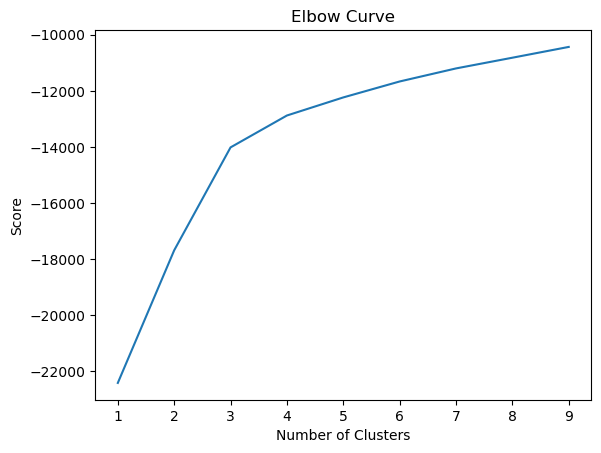

In [29]:
# Plot the elbow curve using PyLab.

pl.plot(num_cl,score)
pl.xlabel('Number of Clusters')
pl.ylabel('Score')
pl.title('Elbow Curve')
pl.show()

The elbowmost clearly bends at '3' so that is the logical number of clusters to use. 

## K Means Clustering

In [34]:
# Create the k-means object.

kmeans = KMeans(n_clusters = 3) 

In [35]:
# Fit the k-means object to the data.

kmeans.fit(mlb_scaled)

C:\Users\cschw\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\cschw\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


KMeans(n_clusters=3)

In [36]:
mlb_scaled['clusters'] = kmeans.fit_predict(mlb_scaled)

C:\Users\cschw\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\cschw\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


In [37]:
mlb_scaled.head()

,Year,W,L,W-L%,R,RA,Rdiff,Home Wins,Home Losses,Road Wins,...,Attendance,Attend/G,BPF,PPF,# of All Stars,Cumulative # of All Stars,Avg Game Time Min,All Star Rating,All Star Viewers,clusters
0,1.50719,-0.193953,-1.460123,0.769574,1.888819,0.367214,0.876853,-0.451313,-1.007302,0.096753,...,-0.373419,0.039658,-0.013433,-0.009299,-0.969225,-0.887868,-1.480969,-1.298368,-0.489817,2
1,1.50719,-1.681662,0.029236,-1.042323,-1.265703,0.553233,-1.116833,-1.808269,0.514410,-1.249807,...,-0.078507,0.332391,0.839950,1.036862,-0.969225,-1.397919,-1.976973,-1.298368,-0.489817,2
2,1.50719,0.177974,-1.832462,1.228753,1.047613,-0.562878,1.001458,0.362860,-1.837326,-0.037903,...,1.565491,2.291319,-0.866816,-1.055460,2.161046,-0.122790,-1.646304,-1.298368,-0.489817,2
3,1.50719,-1.532891,-0.119700,-0.856170,-0.845100,0.181196,-0.618412,-1.265487,-0.315614,-1.519119,...,-2.158531,-2.017700,-1.080161,-0.427764,-0.969225,-1.652945,-2.224974,-1.298368,-0.489817,2
4,1.50719,-0.119568,-1.385655,0.757163,0.627010,-0.376860,0.627642,-0.722705,-0.730627,0.500721,...,0.818486,1.423798,-0.226779,-0.427764,1.534992,-0.122790,-1.563636,-1.298368,-0.489817,2


In [38]:
mlb_scaled['clusters'].value_counts()

clusters
0    124
1    116
2     30
Name: count, dtype: int64

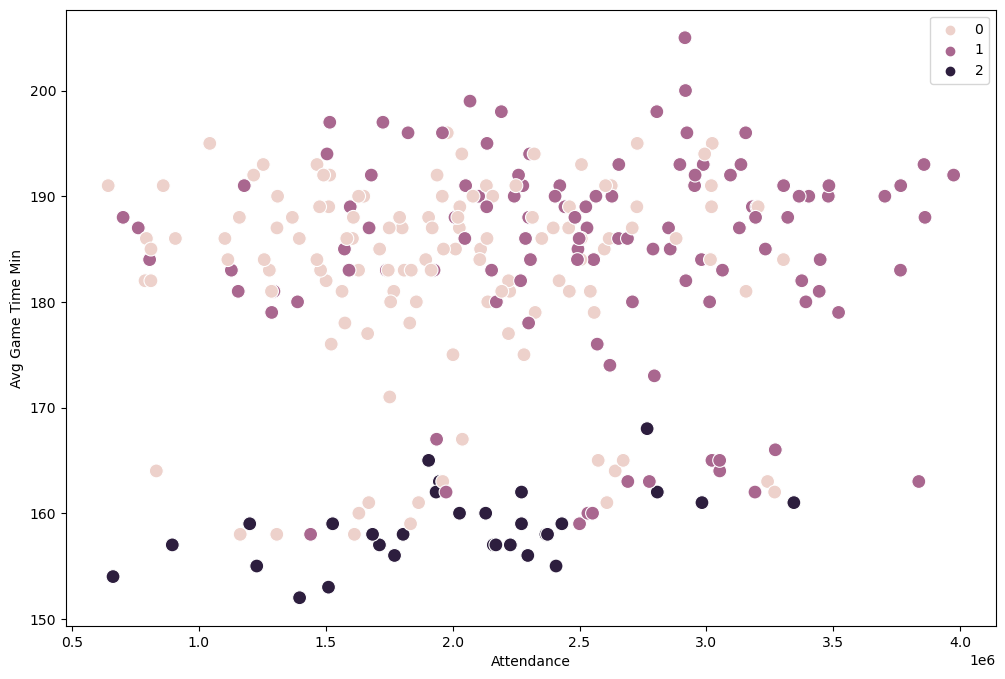

In [39]:
# Plot the clusters for the "Attendance" and "Avg Game Time Min" variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=mlb['Attendance'], y=mlb['Avg Game Time Min'], hue=kmeans.labels_, s=100) 

ax.grid(False)
plt.xlabel('Attendance')
plt.ylabel('Avg Game Time Min') 
plt.show()

Cluster 2 is more clearly defined then then other clusters - it is all grouped near the bottom of the y axis. CLusters 0 and 1 are more distributed throughout the graph. This shows that one cluster of data clearly has lower average game time, but in general the relationship between average game time and attendance is not well defined. 

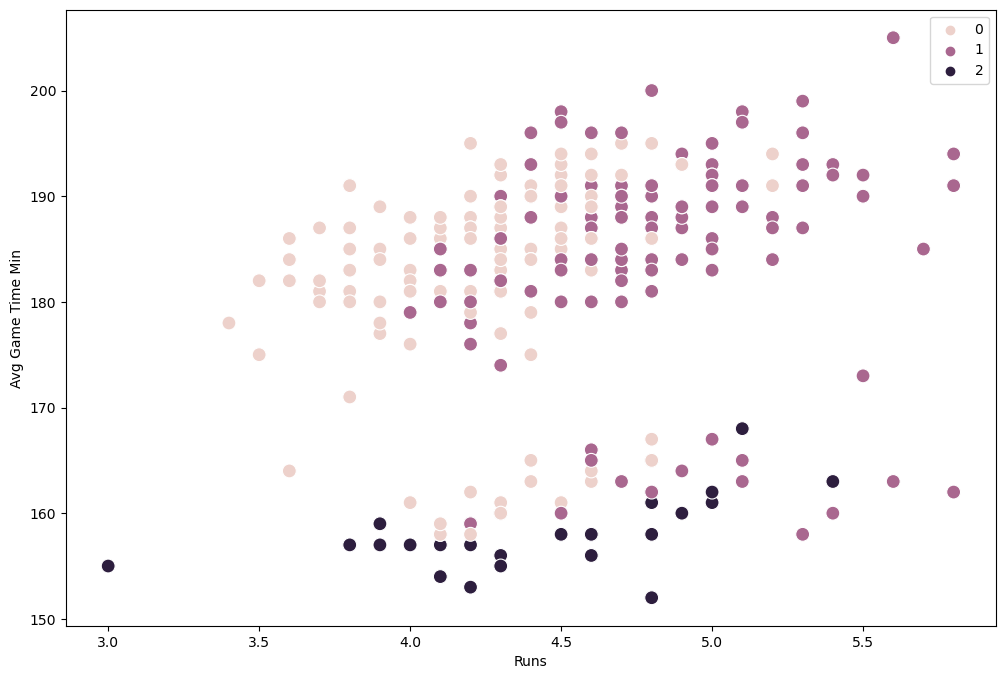

In [87]:
# Plot the clusters for the "Runs" and "Avg Game Time Min" variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=mlb['R'], y=mlb['Avg Game Time Min'], hue=kmeans.labels_, s=100) 

ax.grid(False)
plt.xlabel('Runs')
plt.ylabel('Avg Game Time Min') 
plt.show()

These clusters are a bit more defined. Clusters 0 and 1 make up the higher end of the y axis (though both have some points below 170), whereas cluster 2 is entirely below 170 on the y axis. So, cluster 2 is grouped based on game time. Clusters 0 and 1 have similar values for average game time but cluster 1 extends further along the x axis. This shows that there is some relationship between average game time and runs scored but it is not a perfect relationship. 

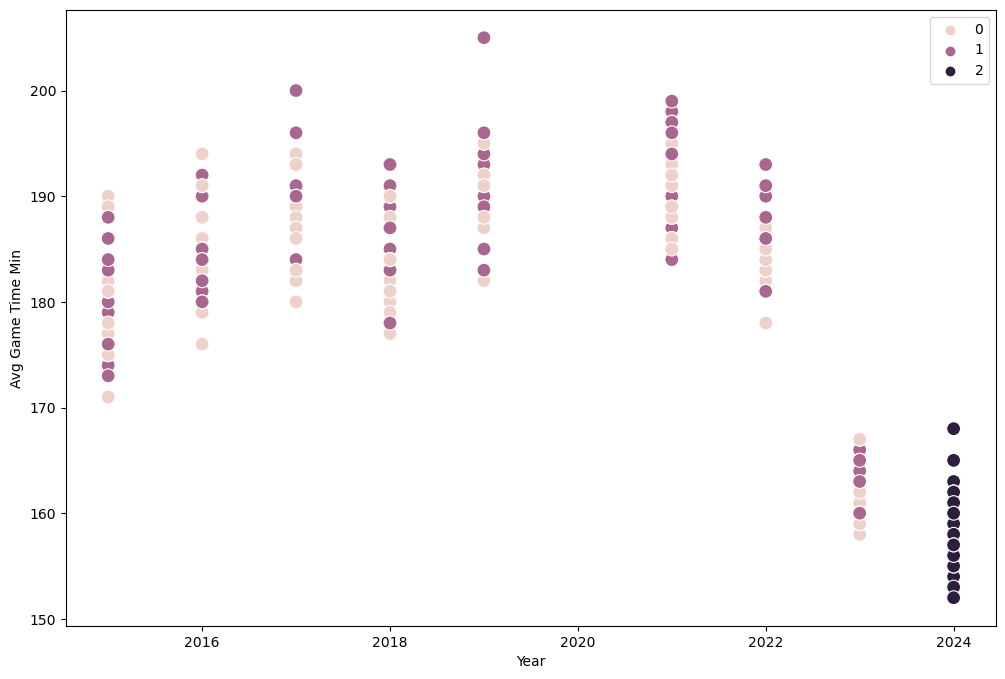

In [93]:
# Plot the clusters for the "Year" and "Avg Game Time Min" variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=mlb['Year'], y=mlb['Avg Game Time Min'], hue=kmeans.labels_, s=100) 

ax.grid(False)
plt.xlabel('Year')
plt.ylabel('Avg Game Time Min') 
plt.show()

Cluster 2 is clearly definied as the entire 2024 season. Interestingly, the 2023 season is not grouped with 2024 into Cluster 2 - there is a clear drop in average game time from 2022 to 2023. This does help support the analysis that game times have significantly decreased since the new rules were implemented. 

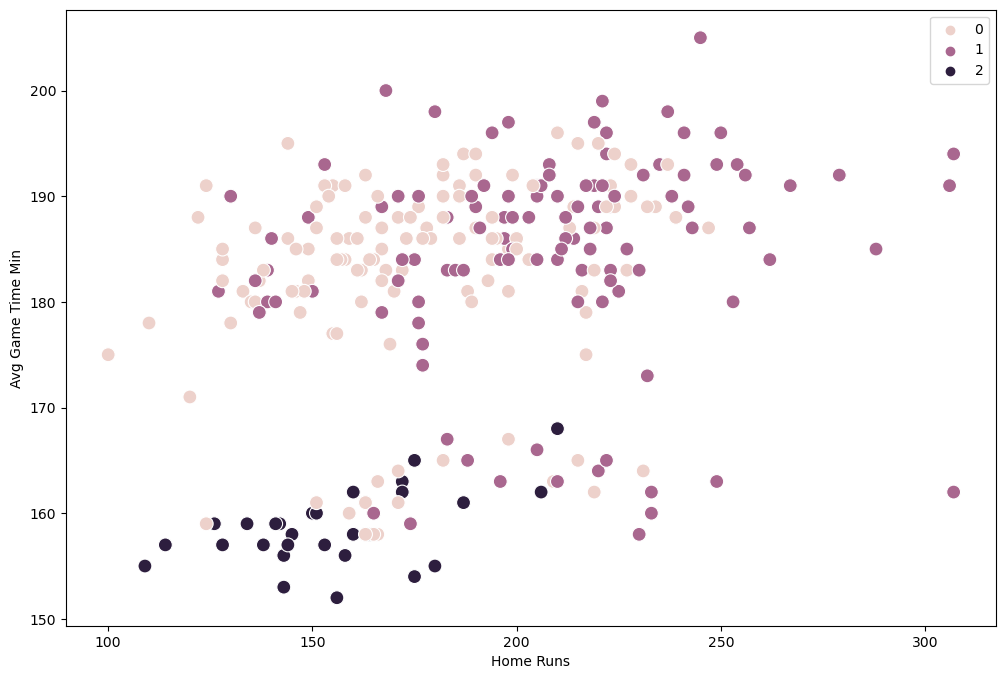

In [45]:
# Plot the clusters for the "Home Runs" and "Avg Game Time Min" variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=mlb['HR'], y=mlb['Avg Game Time Min'], hue=kmeans.labels_, s=100) 

ax.grid(False)
plt.xlabel('Home Runs')
plt.ylabel('Avg Game Time Min') 
plt.show()

The 3 clusters here are somewhat defined. Cluster 2 makes up the bottom left area of the graph, with few home runs and low game times. CLuster 1 in general is comprised of points towards the top right side of the graph with higher game times and more home runs. Cluster 0 makes up the remainder of points in the middle. This seems to suggest some relationship between home runs and average game time - longer games on average have more home runs.

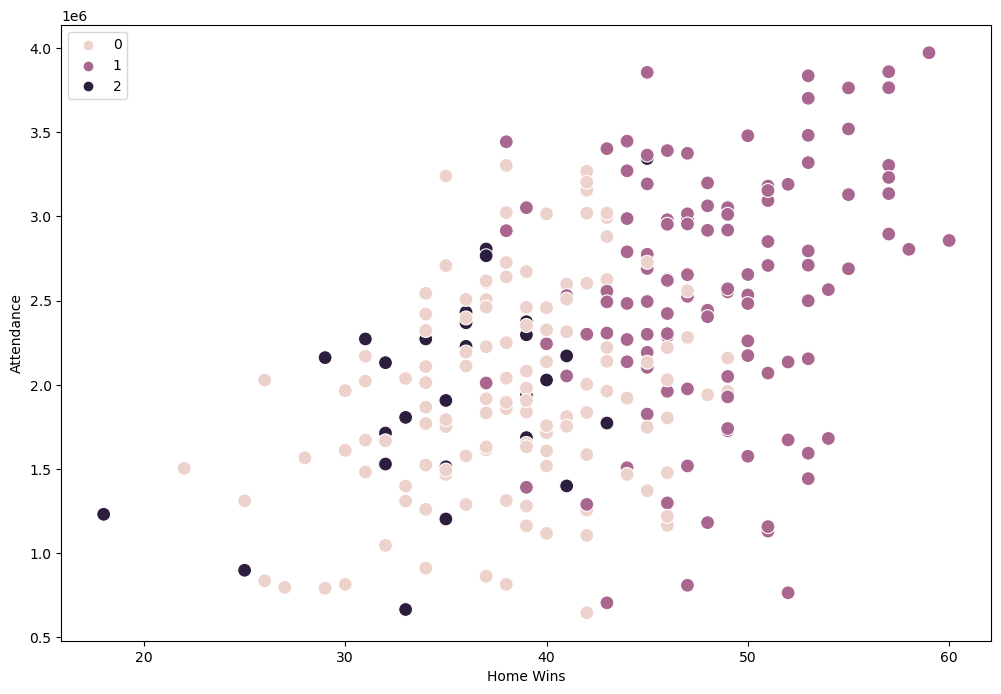

In [47]:
# Plot the clusters for the "Home Wins" and "Attendance" variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=mlb['Home Wins'], y=mlb['Attendance'], hue=kmeans.labels_, s=100) 

ax.grid(False)
plt.xlabel('Home Wins')
plt.ylabel('Attendance') 
plt.show()

In general cluster 1 is towards the right of the graph and cluster 0 towards the left. The points with the highest attendance are also the points with the highest number of home wins. This clustering seems to show that in general teams that win more have higher attendance. However that is not a perfect rule as there are data points with a high number of wins but low number for attendance. This could be partially influenced by the first season after the pandemic when attendance numbers were very low, but naturally teams still won a similar number of games in total. 

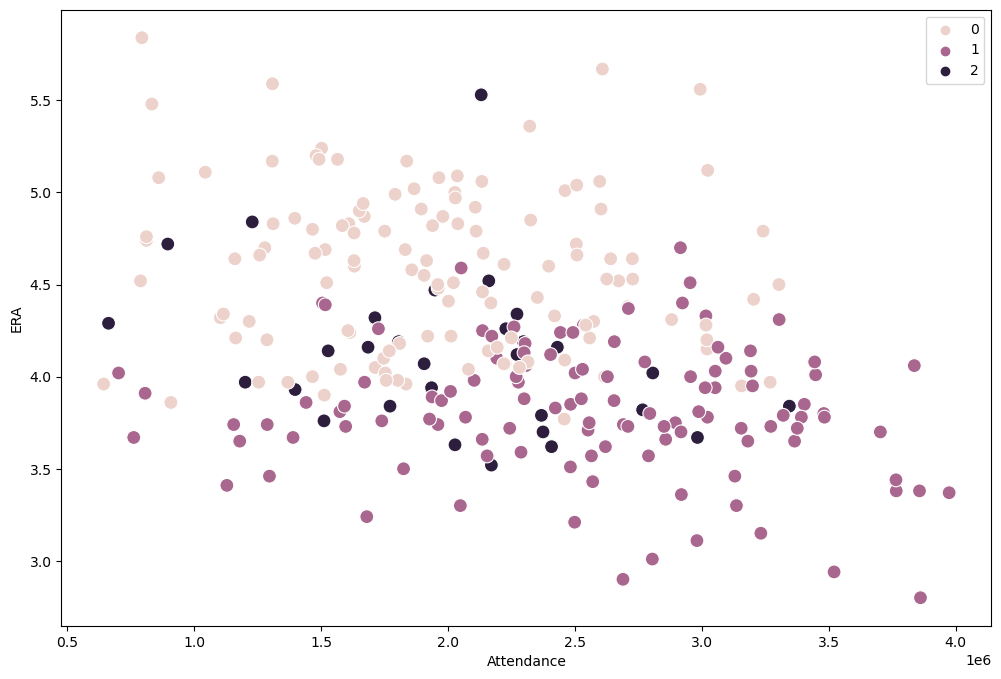

In [48]:
# Plot the clusters for the "ERA" and "Attendance" variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=mlb['Attendance'], y=mlb['ERA'], hue=kmeans.labels_, s=100) 

ax.grid(False)
plt.xlabel('Attendance')
plt.ylabel('ERA') 
plt.show()

These clusters show a general trend that points with a higher ERA have lower attendance. This would be in line with the assumption that better teams have better attendance. A higher ERA value is indicative of poor pitching performance, so it would make sense that teams with poor pitching would lose more, and consequently have lower attendance. However, the groupins are not totally defined and cluster 2 is made up of fewer points and scattered throughout the graph. This would seem to suggest that another variable, potentially average game time or data from the year 2024, is also influencing the clusters. 

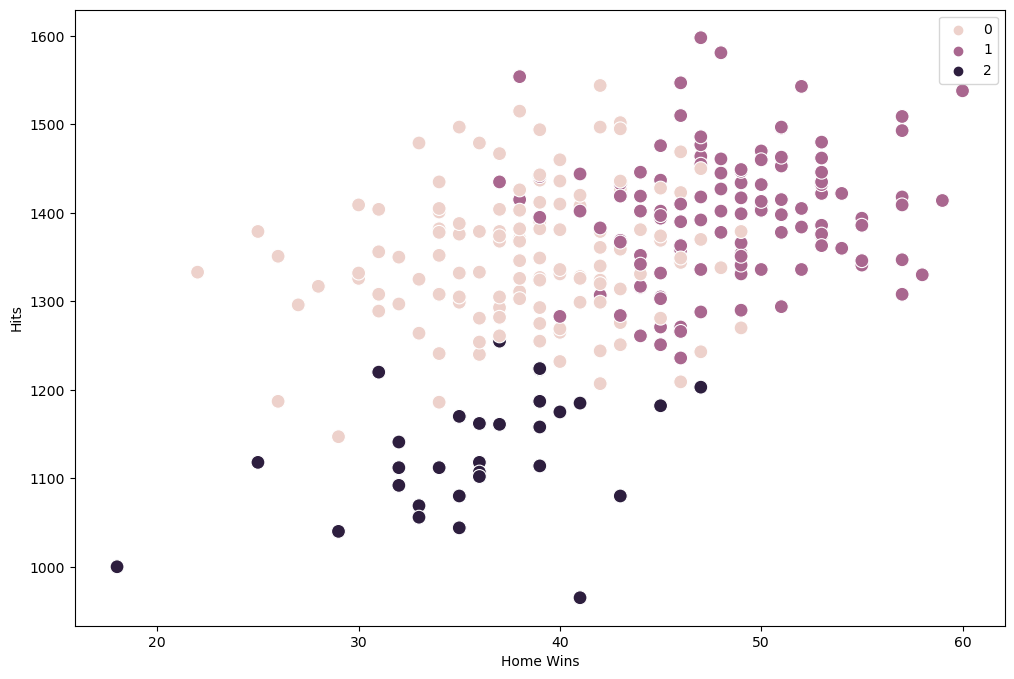

In [72]:
# Plot the clusters for the "Home Wins" and "Hits" variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=mlb['Home Wins'], y=mlb['H'], hue=kmeans.labels_, s=100) 

ax.grid(False)
plt.xlabel('Home Wins')
plt.ylabel('Hits') 
plt.show()

This graph has clearly defined clusters but is less useful for my particular analysis. There seems to be a clear relationship between hits and home wins, which from a game perspective is perfectly logical.

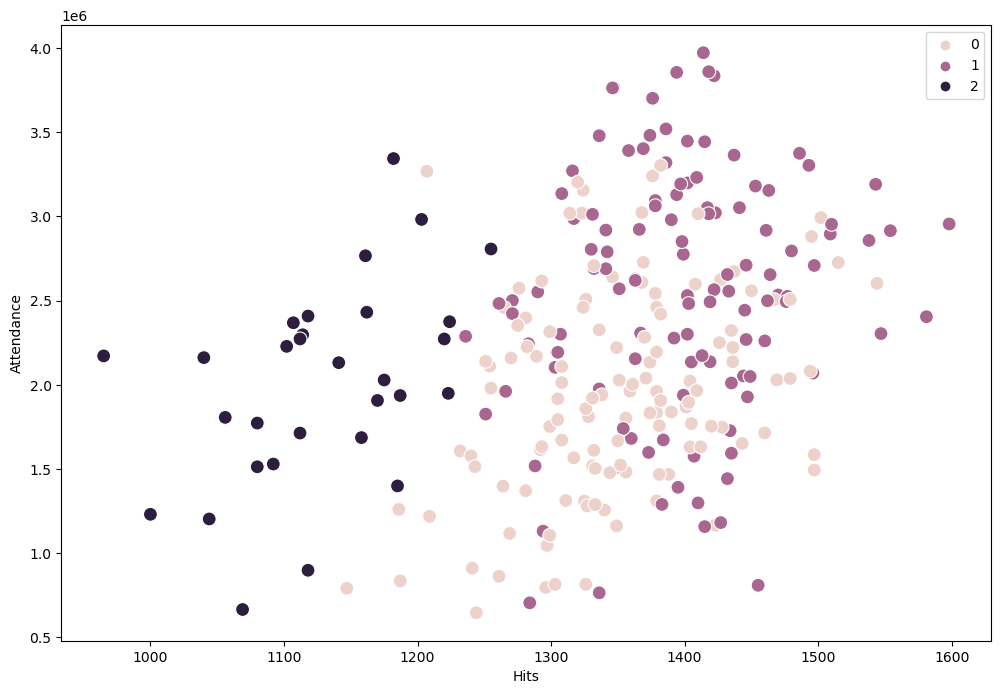

In [76]:
# Plot the clusters for the "Hits" and "Attendance" variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=mlb['H'], y=mlb['Attendance'], hue=kmeans.labels_, s=100) 

ax.grid(False)
plt.xlabel('Hits')
plt.ylabel('Attendance') 
plt.show()

These clusters seem to indicate some mild relationship between game time and hits. There are three somewhat defined clusters. Cluster 1 shows points with high values for attendance and hits, while cluster 2 shows points with lower values for hits and attendance. This relationship isn't perfect, but there seems to be some trend there based on how the clusters are grouped. 

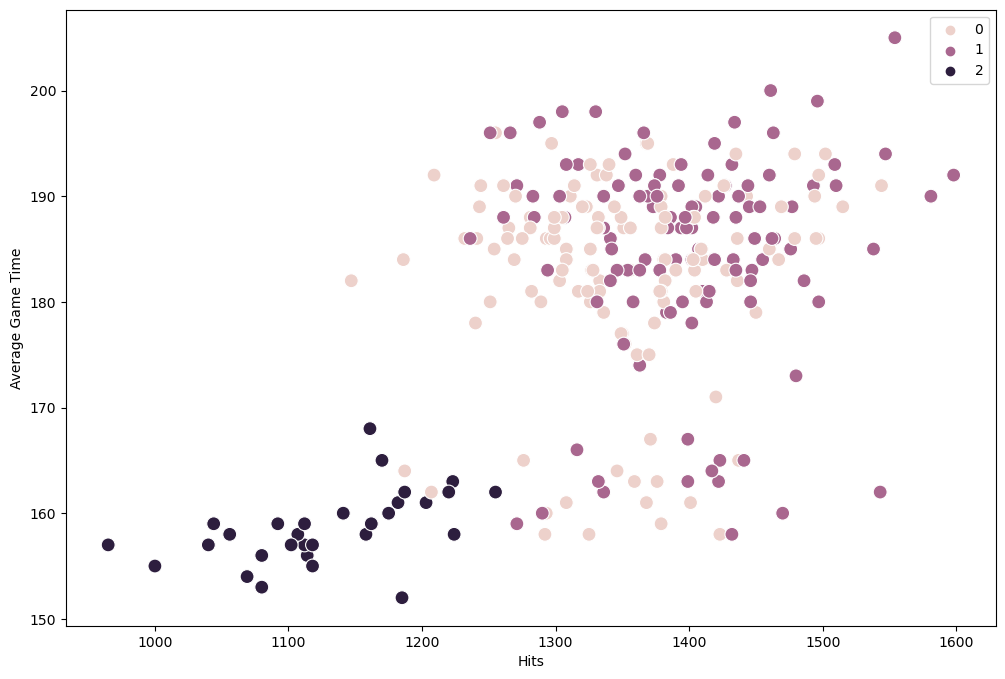

In [82]:
# Plot the clusters for the "Hits" and "Average Game Time" variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=mlb['H'], y=mlb['Avg Game Time Min'], hue=kmeans.labels_, s=100) 

ax.grid(False)
plt.xlabel('Hits')
plt.ylabel('Average Game Time') 
plt.show()

These clusters are clearly broken down by average game time. Cluster 2 is entirely made of points below 170 on the y axis. Interestingly, these points are all also left of 1300 on the x axis. Clusters 0 and 1 are more muddled together, but in general include points with higher values for hits and average game time (though there some points with a lower avg game time.) Overall, this seems to suggest that there are fewer hits in shorter games. When put together with the previous graph that suggests that games with more hits may have higher attendance, MLB may have a logistical problem here. The goal has been to decrease the length of games, which is clearly happening, but in contrast longer games generally have more hits - and people seem to like hits. Essentially, shorter games may lead to less offensive production which may in turn be counter productive to increasing attendance. 

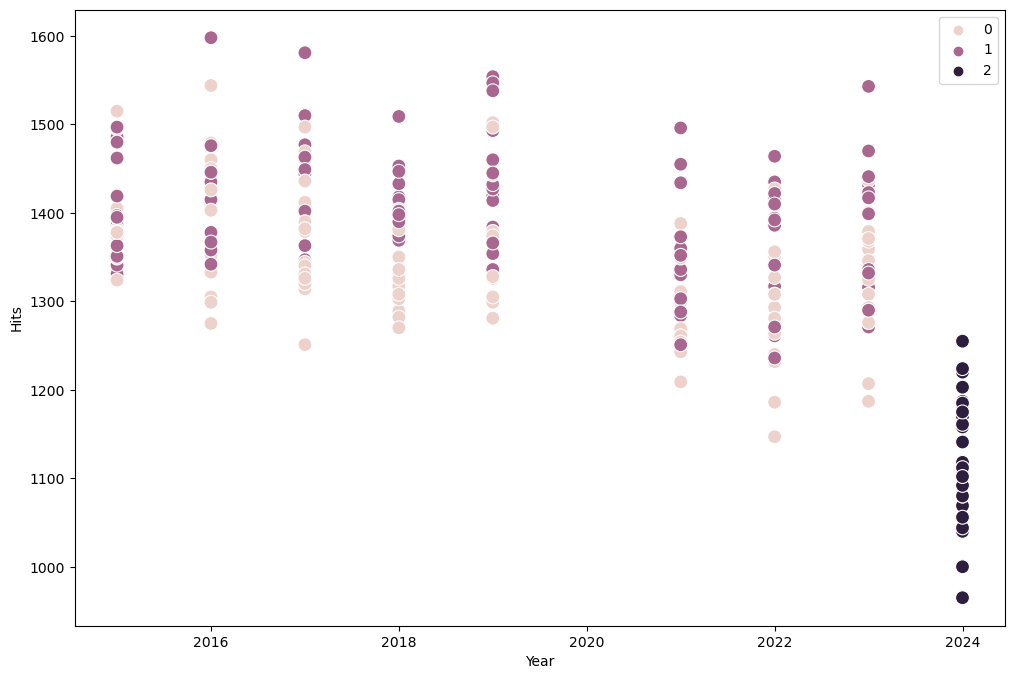

In [99]:
# Plot the clusters for the "Hits" and "Year" variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=mlb['Year'], y=mlb['H'], hue=kmeans.labels_, s=100) 

ax.grid(False)
plt.xlabel('Year')
plt.ylabel('Hits') 
plt.show()

Again, 2024 is its own cluster and represents the lowest values for hits. Cluster 2 represents a clear decrease in the number of hits. Cluster 0 and 1 are much more mixed together and show a relatively stable trend from year to year. With a decrease in the number of hits, MLB will want to continue monitoring how offensive production impacts attendance and is in turn impacted by time of game. 

## Run K-means with subset

In [131]:
mlb_2 = mlb[['Home Wins', 'Attendance', 'Avg Game Time Min', 'Year', 'H', 'HR', 'ERA', 'R']]


In [133]:
mlb_2.head()

,Home Wins,Attendance,Avg Game Time Min,Year,H,HR,ERA,R
0,39,1947852,163,2024,1223,172,4.47,5.4
1,29,2160322,157,2024,1040,138,4.52,3.9
2,45,3344745,161,2024,1182,187,3.84,5.0
3,33,661763,154,2024,1069,175,4.29,4.1
4,37,2806563,162,2024,1255,160,4.02,4.8


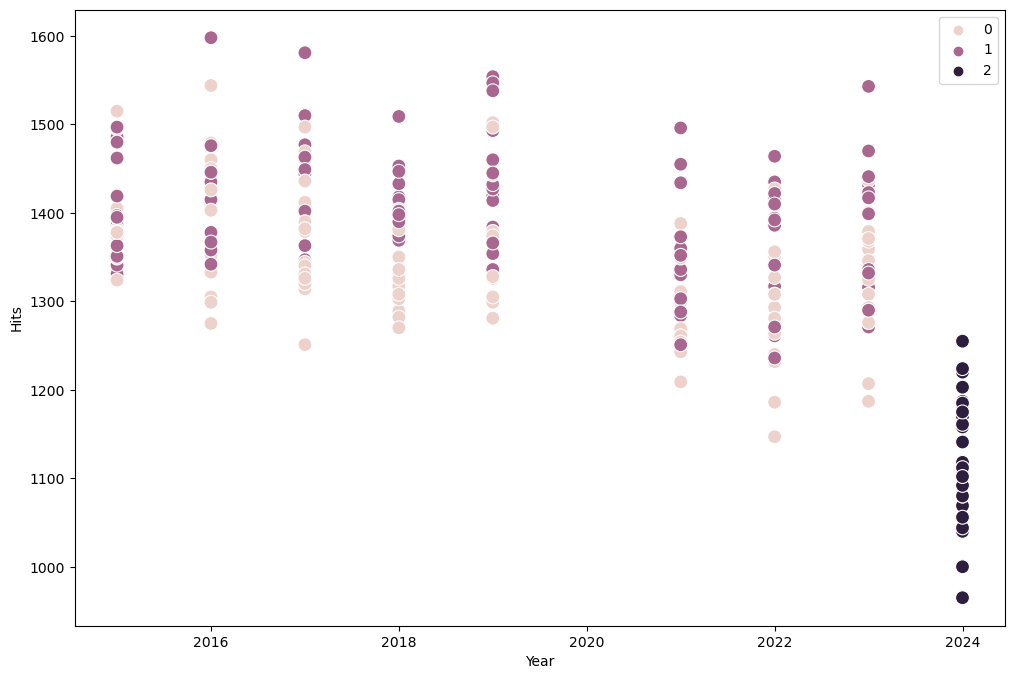

In [135]:
# Plot the clusters for the "Hits" and "Year" variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=mlb_2['Year'], y=mlb['H'], hue=kmeans.labels_, s=100) 

ax.grid(False)
plt.xlabel('Year')
plt.ylabel('Hits') 
plt.show()

Running the k-means on a smaller subset doesn't seem to change the graph much. 

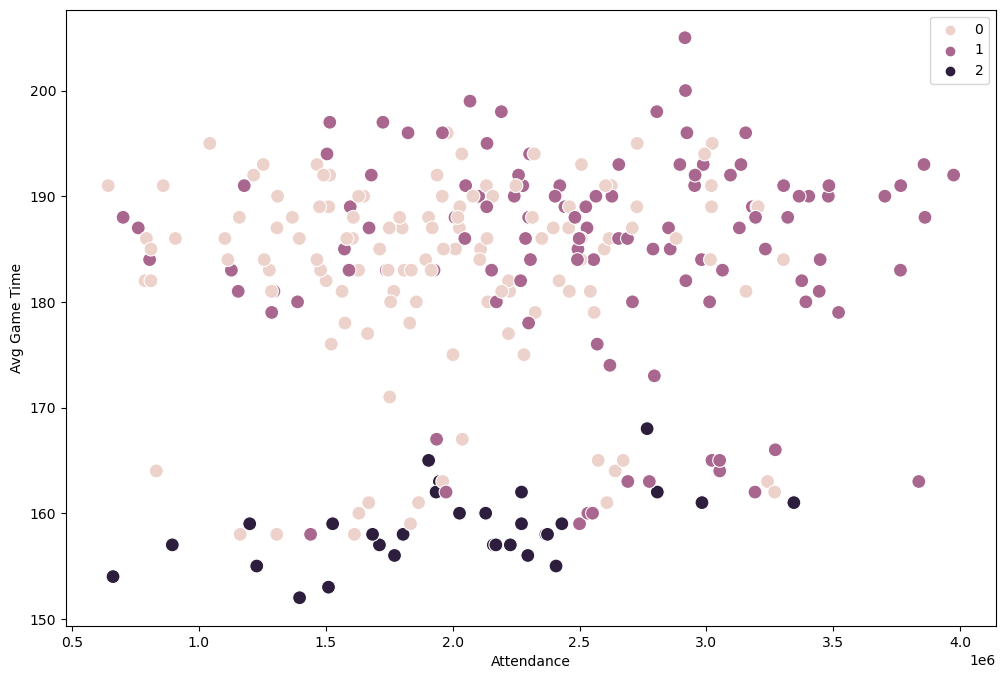

In [141]:
# Plot the clusters for the "Attendance" and "Avg Game Time" variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=mlb['Attendance'], y=mlb['Avg Game Time Min'], hue=kmeans.labels_, s=100) 

ax.grid(False)
plt.xlabel('Attendance')
plt.ylabel('Avg Game Time') 
plt.show()

The smaller subset also doesn't seem to change the graph much here. 

## Descriptive Statistics

In [50]:
mlb['clusters'] = kmeans.fit_predict(mlb_scaled)

C:\Users\cschw\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\cschw\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


In [51]:
mlb.loc[mlb['clusters'] == 2, 'cluster'] = 'dark purple'
mlb.loc[mlb['clusters'] == 1, 'cluster'] = 'purple'
mlb.loc[mlb['clusters'] == 0, 'cluster'] = 'pink'

In [52]:
mlb.groupby('clusters').agg({'Avg Game Time Min':['mean', 'median'], 
                         'Attendance':['mean', 'median'], 
                         'Attend/G':['mean', 'median'],'HR':['mean', 'median'],
                          'R':['mean', 'median']})

Avg Game Time Min           Attendance                 Attend/G  \
                      mean median          mean     median          mean   
clusters                                                                   
0               182.766129  185.0  1.954365e+06  1929046.0  24146.024194   
1               184.706897  187.0  2.551744e+06  2567245.0  31488.301724   
2               158.600000  158.0  2.007161e+06  2078704.0  29302.533333   

                           HR                R         
           median        mean median      mean median  
clusters                                               
0         23815.5  176.395161  171.0  4.243548   4.30  
1         31608.0  208.094828  210.5  4.793966   4.75  
2         30868.0  155.400000  154.5  4.440000   4.40

The descriptive statistics show cluster 2 as being most different from the others in terms of average game time, indicating that cluster 2 must be from 2023 forward. Clusers 0 and 1 are seperated via the rest of the statistics with cluster 1 containing higher values then cluster 0. 